In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
weather = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Climate Wins\2. Data Sets\snow_days.csv")
answers = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Climate Wins\2. Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

In [3]:
weather

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7               2.1            0.85   
1      19600102      1                  6               2.1            0.84   
2      19600103      1                  8               2.1            0.90   
3      19600104      1                  3               2.1            0.92   
4      19600105      1                  6               2.1            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1               2.1            0.79   
22946  20221028     10                  6               2.1            0.77   
22947  20221029     10                  4               2.1            0.76   
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_humidity  \
0                     0             0.7  ...               0.88   
1                     0             1.1  ...               0.91   
2                     0             0.0  ...               0.91   
3                     0             4.1  ...               0.86   
4                     0             5.4  ...               0.80   
...                 ...             ...  ...                ...   
22945                 0             7.7  ...               0.82   
22946                 0             5.4  ...               0.82   
22947                 0             6.1  ...               0.82   
22948                 0             5.8  ...               0.82   
22949                 0             3.2  ...               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    0.41   
22947             1.0142                       1.13                    0.41   
22948             1.0142                       1.13                    0.41   
22949             1.0142                       1.13                    0.41   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                        0                4.7                 8.5   
1                        0                0.7                 8.9   
2                        0                0.1                10.5   
3                        0                0.0                 7.4   
4                        0                5.7                 5.7   
...                    ...                ...        

In [4]:
# 1997
d1997 = weather[weather['DATE']. astype(str).str.startswith("1997")]

In [5]:
d1997

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
13515  19970101      1                  7               2.1            0.80   
13516  19970102      1                  8               2.1            0.82   
13517  19970103      1                  6               2.1            0.85   
13518  19970104      1                  8               2.1            0.90   
13519  19970105      1                  8               2.1            0.92   
...         ...    ...                ...               ...             ...   
13875  19971227     12                  7               2.1            0.74   
13876  19971228     12                  6               2.1            0.81   
13877  19971229     12                  5               2.1            0.82   
13878  19971230     12                  6               2.1            0.78   
13879  19971231     12                  7               2.1            0.76   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
13515          1.0191                    0.14                 0.00   
13516          1.0185                    0.18                 0.01   
13517          1.0084                    0.48                 0.00   
13518          1.0033                    0.18                 0.54   
13519          1.0122                    0.18                 0.00   
...               ...                     ...                  ...   
13875          1.0131                    0.30                 0.00   
13876          1.0159                    0.28                 0.00   
13877          1.0156                    0.56                 0.00   
13878          1.0157                    0.35                 0.00   
13879          1.0143                    0.12                 0.07   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_humidity  \
13515                 6             0.0  ...               0.77   
13516                 6             0.0  ...               0.85   
13517                 5             1.2  ...               0.89   
13518                 5             0.0  ...               0.86   
13519                12             0.0  ...               0.73   
...                 ...             ...  ...                ...   
13875                 0             0.1  ...               0.73   
13876                 0             0.9  ...               0.86   
13877                 0             4.9  ...               0.84   
13878                 0             0.3  ...               0.90   
13879                 0             0.0  ...               0.75   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
13515             1.0274                       0.41                    0.00   
13516             1.0236                       0.12                    0.52   
13517             1.0180                       0.39                    0.00   
13518             1.0173                       0.44                    0.00   
13519             1.0181                       0.34                    0.00   
...                  ...                        ...                     ...   
13875             1.0146                       0.37                    0.06   
13876             1.0103                       0.35                    0.19   
13877             0.9999                       0.12                    1.14   
13878             0.9905                       0.12                    1.24   
13879             0.9988                       0.31                    1.47   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
13515                    0                5.4                 0.5   
13516                    0                0.0                 0.5   
13517                    3                3.5                -2.1   
13518                    3                6.1                -2.7   
13519                    3                2.6                -0.1   
...                    ...                ...        

UNscaled Dendrograms

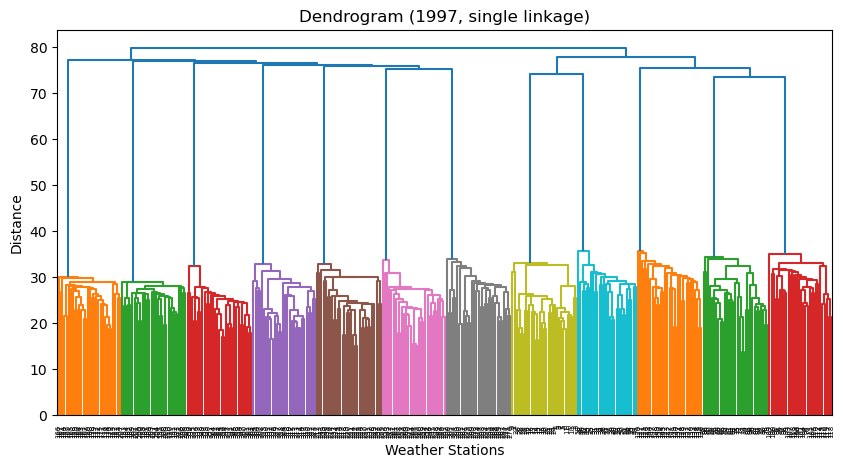

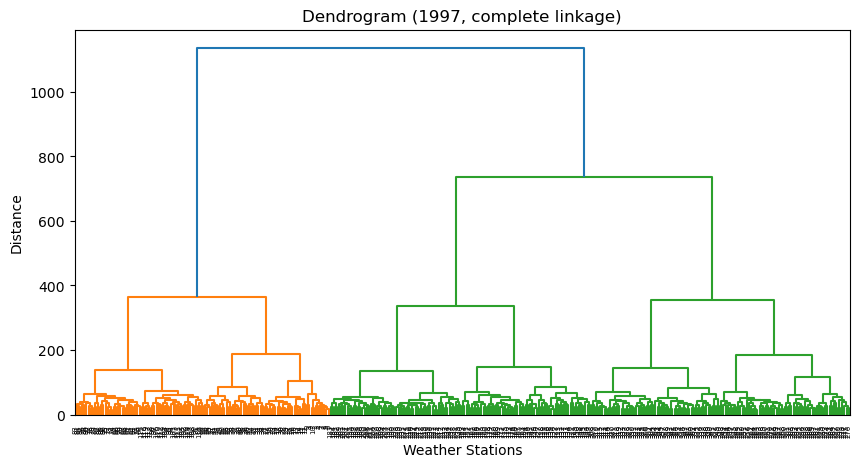

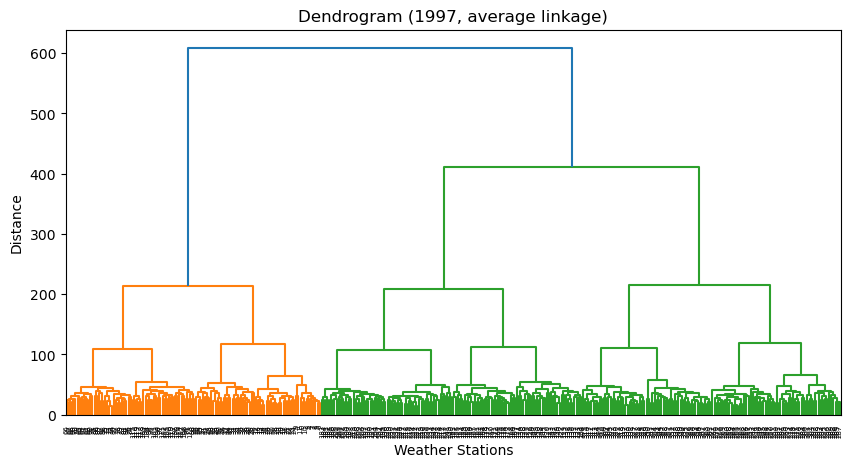

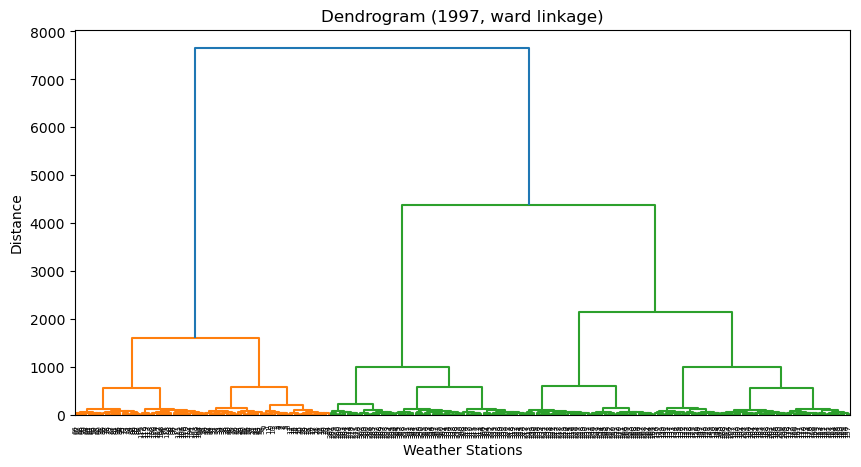

In [6]:
import scipy.cluster.hierarchy as sch
methods = ['single', 'complete', 'average', 'ward']

for m in methods:
    plt.figure(figsize=(10,5))
    dend = sch.dendrogram(sch.linkage(d1997, method=m))
    plt.title(f"Dendrogram (1997, {m} linkage)")
    plt.xlabel("Weather Stations")
    plt.ylabel("Distance")
    plt.show()

Scaled Dendrograms

In [7]:
#Separate features: drop DATE & MONTH if present / non-numeric columns
feature_cols = [c for c in d1997.columns if c not in ["DATE", "MONTH", "SnowDay"]]
X_unscaled = d1997[feature_cols].select_dtypes(include=[np.number]).copy()

In [8]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=X_unscaled.columns, index=X_unscaled.index)

In [9]:
#Ward clustering with max 5 clusters
clusters = fcluster(sch.linkage(d1997, method='ward'), t=5, criterion='maxclust')

# Add cluster labels back to dataframe for inspection
X_scaled['cluster'] = clusters

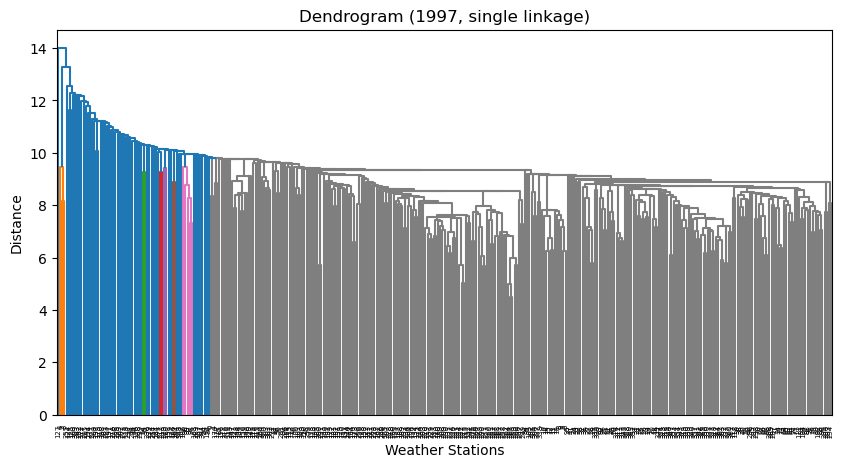

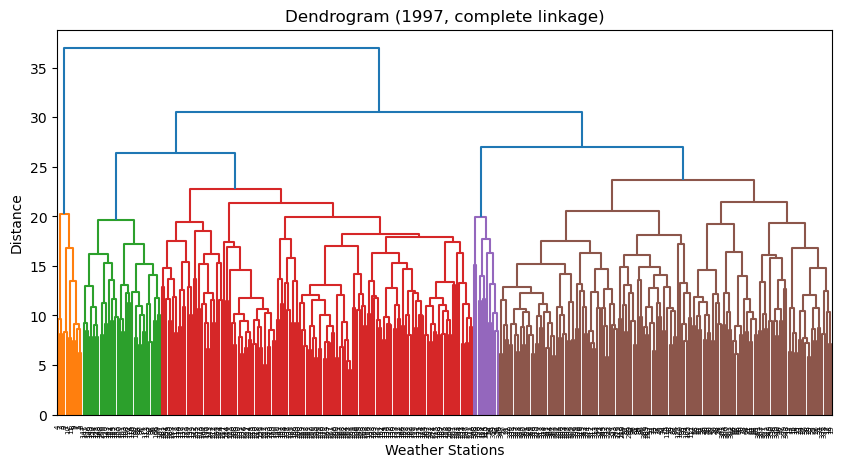

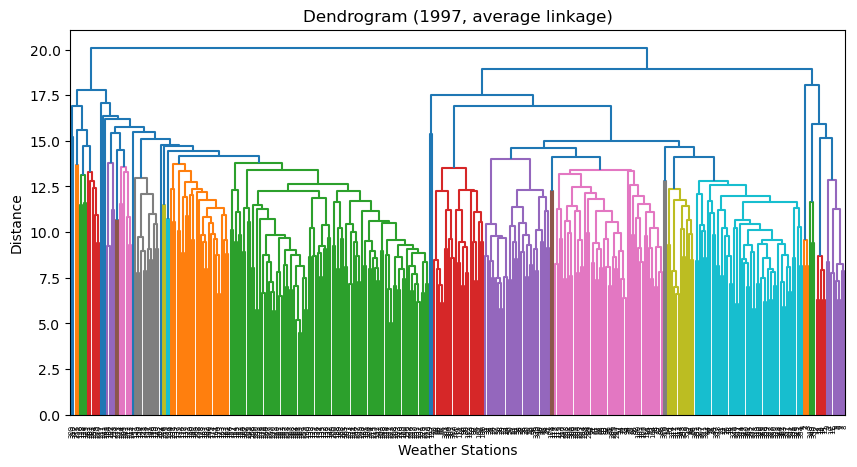

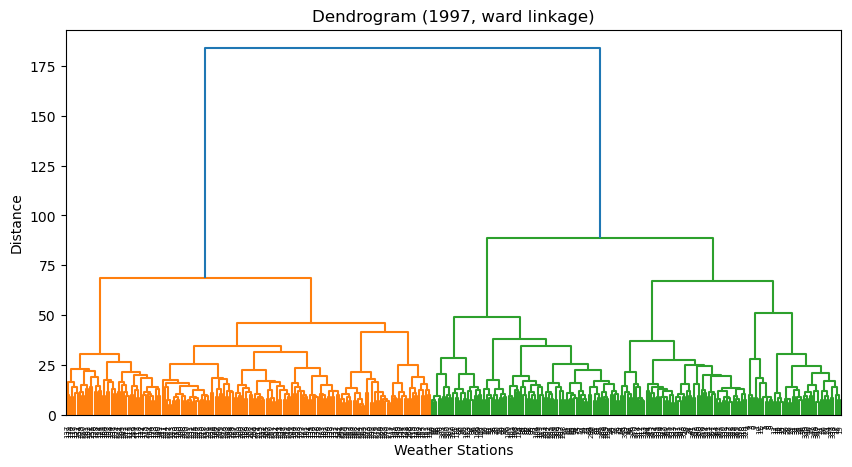

In [10]:
methods = ['single', 'complete', 'average', 'ward']

for m in methods:
    plt.figure(figsize=(10,5))
    dend = sch.dendrogram(sch.linkage(X_scaled, method=m))
    plt.title(f"Dendrogram (1997, {m} linkage)")
    plt.xlabel("Weather Stations")
    plt.ylabel("Distance")
    plt.show()

In [11]:
X_scaled

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
13515           0.722518     -4.440892e-16        0.542268        0.026800   
13516           1.122699     -4.440892e-16        0.725875       -0.050733   
13517           0.322337     -4.440892e-16        1.001285       -1.355874   
13518           1.122699     -4.440892e-16        1.460301       -2.014905   
13519           1.122699     -4.440892e-16        1.643907       -0.864831   
...                  ...               ...             ...             ...   
13875           0.722518     -4.440892e-16       -0.008552       -0.748531   
13876           0.322337     -4.440892e-16        0.634071       -0.386710   
13877          -0.077843     -4.440892e-16        0.725875       -0.425476   
13878           0.322337     -4.440892e-16        0.358662       -0.412554   
13879           0.722518     -4.440892e-16        0.175055       -0.593465   

       BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
13515               -1.337022            -0.402258          2.600660   
13516               -1.292048            -0.382752          2.600660   
13517               -0.954743            -0.402258          2.120761   
13518               -1.292048             0.651085          2.120761   
13519               -1.292048            -0.402258          5.480057   
...                       ...                  ...               ...   
13875               -1.157126            -0.402258         -0.278736   
13876               -1.179613            -0.402258         -0.278736   
13877               -0.864795            -0.402258         -0.278736   
13878               -1.100908            -0.402258         -0.278736   
13879               -1.359509            -0.265714         -0.278736   

       BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  \
13515       -1.131594        -2.946625       -2.869807  ...   
13516       -1.131594        -2.932795       -2.823674  ...   
13517       -0.864634        -2.338120       -2.423849  ...   
13518       -1.131594        -2.075357       -1.870245  ...   
13519       -1.131594        -1.798764       -1.578065  ...   
...               ...              ...             ...  ...   
13875       -1.109348        -0.609414       -0.347835  ...   
13876       -0.931374        -0.927496       -1.039840  ...   
13877       -0.041507        -1.300897       -1.178241  ...   
13878       -1.064854        -1.204089       -1.116729  ...   
13879       -1.131594        -0.872177       -0.516992  ...   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
13515          -0.561561           1.114748                  -0.777854   
13516           0.408136           0.799090                  -1.117958   
13517           0.892985           0.333910                  -0.801310   
13518           0.529348           0.275763                  -0.742671   
13519          -1.046409           0.342217                  -0.859948   
...                  ...                ...                        ...   
13875          -1.046409           0.051479                  -0.824765   
13876           0.529348          -0.305713                  -0.848220   
13877           0.286924          -1.169619                  -1.117958   
13878           1.014197          -1.950457                  -1.117958   
13879          -0.803985          -1.260993                  -0.895131   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
13515               -0.639308            -0.091035           0.525631   
13516                0.223590            -0.091035          -0.910293   
13517               -0.639308            10.984838           0.020399   
13518               -0.639308            10.984838           0.711770   
13519               -0.639308            10.984838          -0.218922   
...                       ...                  ...                ...   
13875               -0.539743            -0.0910

In [12]:
# Run clustering
linked = linkage(X_unscaled, method="ward")
clusters = fcluster(linked, 2, criterion="maxclust")  # 2 clusters

# Reattach DATE, MONTH, pleasant_weather, and cluster labels
df_results = d1997.copy()
df_results["Cluster"] = clusters

# Crosstab comparison
comparison = pd.crosstab(df_results["Cluster"], df_results["SnowDay"])
print(comparison)

SnowDay    0   1
Cluster         
1        167   0
2        166  32


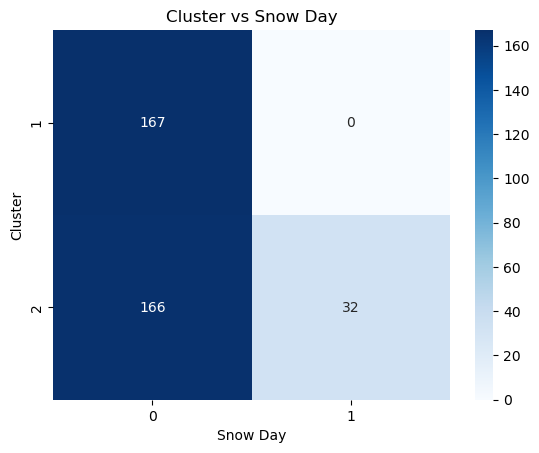

In [13]:
sns.heatmap(comparison, annot=True, fmt="d", cmap="Blues")
plt.title("Cluster vs Snow Day")
plt.ylabel("Cluster")
plt.xlabel("Snow Day")
plt.show()

Cluster results:

Two clusters identified.

Cluster 1 contained 167 days (100% unpleasant).

Cluster 2 contained 198 days, with 32 (16%) pleasant days and 166 unpleasant days.

Interpretation:

The clustering shows that one group (Cluster 1) maps entirely to unpleasant days, while the other (Cluster 2) contains a small share of pleasant days.

This indicates that, while the algorithm does separate weather patterns into distinct clusters, the separation does not strongly align with the pleasant-weather labels, suggesting those labels may depend on subtle feature combinations not captured by the linkage distance.

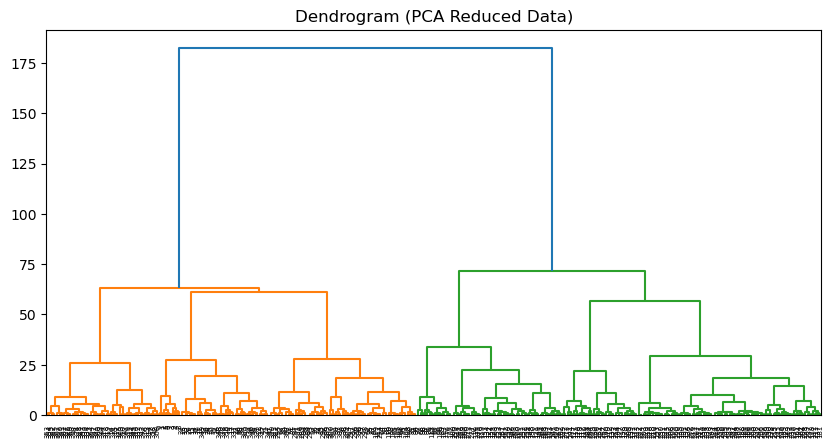

In [14]:
X_scaled = StandardScaler().fit_transform(d1997.iloc[:, 1:-1])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

linked_pca = linkage(X_pca, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked_pca)
plt.title("Dendrogram (PCA Reduced Data)")
plt.show()

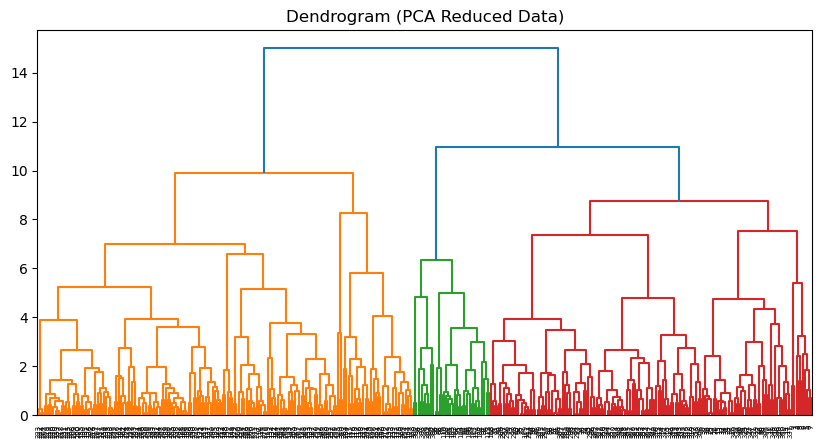

In [16]:
X_scaled = StandardScaler().fit_transform(d1997.iloc[:, 1:-1])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

linked_pca = linkage(X_pca, method='average')
plt.figure(figsize=(10,5))
dendrogram(linked_pca)
plt.title("Dendrogram (PCA Reduced Data)")
plt.show()

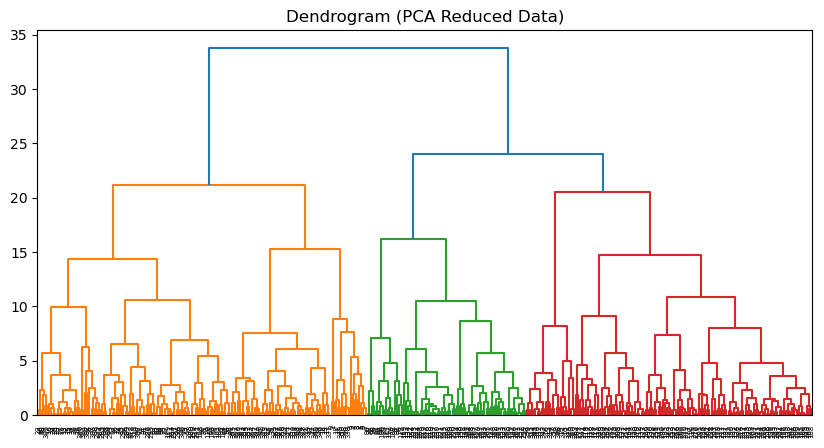

In [18]:
X_scaled = StandardScaler().fit_transform(d1997.iloc[:, 1:-1])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

linked_pca = linkage(X_pca, method='complete')
plt.figure(figsize=(10,5))
dendrogram(linked_pca)
plt.title("Dendrogram (PCA Reduced Data)")
plt.show()

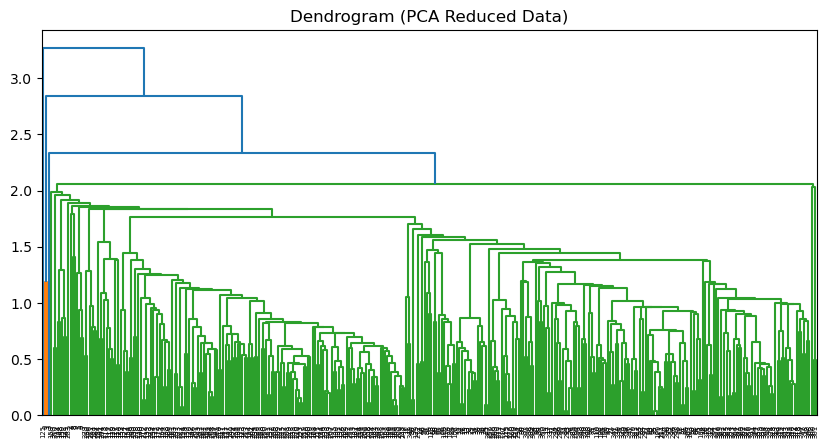

In [20]:
X_scaled = StandardScaler().fit_transform(d1997.iloc[:, 1:-1])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

linked_pca = linkage(X_pca, method='single')
plt.figure(figsize=(10,5))
dendrogram(linked_pca)
plt.title("Dendrogram (PCA Reduced Data)")
plt.show()

In [21]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())

Explained variance ratio: [0.37315034 0.12020254]
Cumulative variance: [0.37315034 0.49335288]


**PCA Explained Variance**

The PCA reduced dataset retained nearly half of the total variance:

- PC1 explained 37.3% of the variance  
- PC2 explained 12.0%  
- Together, the first two components captured 49.3% of the variance in the original data  

This 2-component reduction was then used for hierarchical clustering across all four linkage methods, enabling simpler dendrograms and clearer cluster separation compared with the unscaled and scaled datasets.

In [22]:
pd.DataFrame(d1997).to_csv('97_weather.csv')

In [23]:
pd.DataFrame(X_scaled).to_csv('97_weather_scaled.csv')

In [24]:
pd.DataFrame(X_pca).to_csv('97_weather_pca.csv')

In [25]:
pd.DataFrame(df_results).to_csv('97_weather_clus.csv')